# Perceptron training handout


In [0]:
import numpy as np
import pylab as pl
from sklearn.datasets.samples_generator import make_blobs

%matplotlib inline

In [0]:
def plot_data(X, y):
    y_unique = np.unique(y)
    colors = pl.cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
    for this_y, color in zip(y_unique, colors):
        this_X = X[y == this_y]
        pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,
                    alpha=0.5, edgecolor='k',
                    label="Class %s" % this_y)
    pl.legend(loc="best")
    pl.title("Data")
    
def plot_decision_region(X, pred_fun):
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 30)
    y_vals = np.linspace(min_y, max_y, 30)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            ZZ[i, j] = pred_fun(XX[i, j], YY[i, j])
    pl.contourf(XX, YY, ZZ, 30, cmap = pl.cm.coolwarm, vmin= -1, vmax=2)
    pl.colorbar()
    pl.xlabel("x")
    pl.ylabel("y")

## Two Class Classification Problem


(100, 2)
[[ 4.21850347  2.23419161]
 [ 0.90779887  0.45984362]
 [-0.27652528  5.08127768]
 [ 0.08848433  2.32299086]
 [ 3.24329731  1.21460627]
 [ 1.44193252  2.76754364]
 [ 1.0220286   4.11660348]
 [ 3.97820955  2.37817845]
 [ 0.58894326  4.00148458]
 [ 1.25185786  0.20811388]]
(100,)
[1 1 0 0 1 0 0 1 0 1]


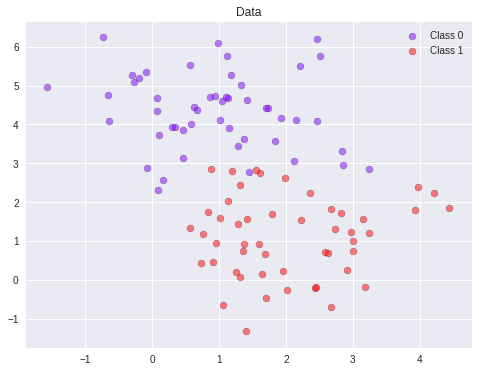

In [0]:
X, Y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=0)
pl.figure(figsize=(8, 6))
plot_data(X, Y)
print(X.shape)
print(X[0:10])
print(Y.shape)
print(Y[0:10])

## How to solve it?

* We need to design a prediction function $f:\mathbb{R}^{2}\rightarrow\mathbb{R}$ such that:

$$\textrm{Prediction}(x)=\begin{cases}
C_{1} & \mbox{si }f(x)\ge \theta\\
C_{2} & \mbox{si }f(x)<\theta
\end{cases}$$

* Here we will model $f$ as a logistic model with parameters $w$ and $w_0$:

$$f_w(x) = P(C_1|x)= \sigma(wx+w_0)$$

where 
$$\sigma(x) = \frac{1}{1+e^{-x}}$$


## Perceptron

This model corresponds to a perceptron or logistic regression model

$$f_w(x,y) = P(C_1|x)= \sigma(wx+w_0)$$

where 
$$\sigma(x) = \frac{1}{1+e^{-x}}$$


In [0]:
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

def predict(w, x):
    a = np.dot(w[1:], x) + w[0]
    z = sigmoid(a)
    return z

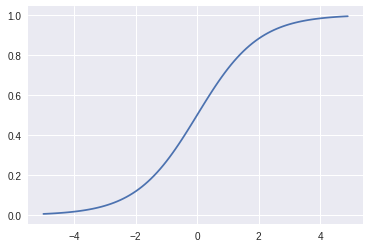

In [0]:
x_plot = np.arange(-5,5,0.1)
pl.plot(x_plot, sigmoid(x_plot))

## Learning as optimization

* General optimization problem:
$$\min_{f\in H}L(f,D)$$
* Hypothesis space: 
$$H=\{f_w(x,y)=\sigma(wx+w_0),\forall w\in\mathbb{R}^n and w_0\in\mathbb{R}\}$$
* Cross entropy loss function:
$$L(f,D)=\sum_{(x_{i},r_{i})\in D} -r_i\log(f(x_i)) -(1-r_i)\log(1 - f(x_i))$$
* Measures the likelihood of the the probabilistic model represented by $f$ given the data $D$.


## Calculating the cross entropy loss

In [0]:
def xentropy_loss(w, x, y):
    return - y * np.log(predict(w, x)) - (1 - y) * np.log(1 - predict(w, x))

def batch_loss(loss_fun, w, X, Y, ):
    n = X.shape[0]
    tot_loss = 0
    for i in range(n):
        tot_loss += loss_fun(w, X[i], Y[i])
    return tot_loss

In [0]:
def plot_loss(loss):
    w1_vals = np.linspace(-2, 2, 30)
    w2_vals = np.linspace(-2, 2, 30)
    W1, W2 = np.meshgrid(w1_vals, w2_vals)
    grid_r, grid_c = W1.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            ZZ[i, j] = loss(W1[i, j], W2[i, j])
    pl.contourf(W1, W2, ZZ,30, cmap = pl.cm.jet)
    pl.colorbar()
    pl.xlabel("w1")
    pl.ylabel("w2")

def bloss_xe(w1, w2):
    w = np.array([1, w1, w2])
    return batch_loss(xentropy_loss, w, X, Y)

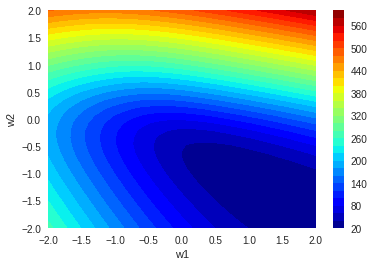

In [0]:
plot_loss(bloss_xe)

## Other loss fuctions

* There are several different loss functions.

* $L_1$ loss:

$$ L_1(f, D) =\sum_{(x_{i},r_{i})\in D} |r_i - f(x_i)| $$

* $L_2$ loss:

$$ L_2(f, D) =\sum_{(x_{i},r_{i})\in D} (r_i - f(x_i))^2 $$

In [0]:
def l1_loss(w, x, y):
    return np.abs(y - predict(w, x))

def loss1(w1, w2):
    w = np.array([1, w1, w2])
    return batch_loss(l1_loss, w, X, Y)

def l2_loss(w, x, y):
    return (y - predict(w, x)) ** 2 / 2

def loss2(w1, w2):
    w = np.array([1, w1, w2])
    return batch_loss(l2_loss, w, X, Y)

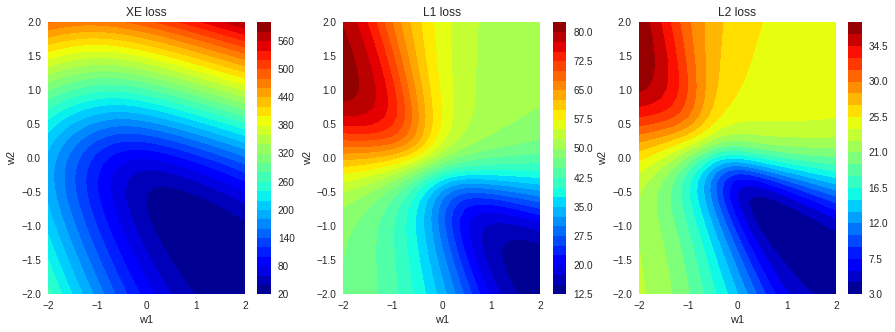

In [0]:
pl.figure(figsize = (15,5))
pl.subplot(1,3,1); plot_loss(bloss_xe); pl.title("XE loss")
pl.subplot(1,3,2); pl.title("L1 loss"); plot_loss(loss1)
pl.subplot(1,3,3); pl.title("L2 loss"); plot_loss(loss2)

## How to solve the learning problem? 

* There are different optimization strategies:
  * Linear optimization
  * Convex optimization
  * Non-linear optimization
  * Combinatorial optimization
* No unique optimization strategy that works for all the problems: "no free lunch theorem"

## How to solve the learning problem?  (cont.)

* Trade-offs:
  * Global optimum guarantee
  * Simplicity of the method
  * Easy parameter tuning
  * Scalability
  * Potential parallelization
* In machine learning preferences change over time.
* Nowadays scalable, easy parallelizable strategies are preferred even at the expense of guaranteed optimality.

## Gradient descent
<center> ![gradient descent image](https://cdn-images-1.medium.com/max/1600/1*f9a162GhpMbiTVTAua_lLQ.png)</center>

## Logistic regression gradient

$$
\begin{aligned}L(f,D) & = \sum_{(x_{i},r_{i})\in D} -r_i\log(f(x_i)) -(1-r_i)\log(1 - f(x_i))\\
 & =\sum_{(x_{i},r_{i})\in D}E(w, x_i, r_i)
\end{aligned}
$$
If $f_w$ is the sigmoid function:
$$
\frac{\partial E(w,x_{i,}r_{i})}{\partial w_i}=(f_{w}(x_{i})-r_{i})x_{i}
$$


In [0]:
def de_dw(w, x, r):
    x_prime = np.zeros(len(x) + 1)
    x_prime[1:] = x
    x_prime[0] = 1
    return (predict(w, x) - r) * x_prime

## Checking the gradient calculation

*"During the last twenty years, I have often been approached for advice in setting the learning rates of some rebellious stochastic gradient descent program. My advice is to forget about the learning rates and check that the gradients are computed correctly."* 

**Bottou, L.** (2012). *Stochastic gradient descent tricks*. In Neural networks: Tricks of the trade (pp. 421-436). Springer Berlin Heidelberg.

In [0]:
def num_de_dw(w, x, y, epsilon):
    deltas = np.identity(len(w)) * epsilon
    de = np.zeros(len(w))
    for i in range(len(w)):
        de[i] = (xentropy_loss(w + deltas[i, :], x, y) - xentropy_loss(w - deltas[i, :], x, y)) / (2 * epsilon)
    return de

def test_de_dw():
    num_tests = 100
    epsilon = 0.0001
    for i in range(num_tests):
        tw = np.random.randn(3)
        tx = np.random.randn(2)
        ty = np.random.randn(1)
        if np.linalg.norm(de_dw(tw, tx,ty) - num_de_dw(tw, tx, ty, epsilon)) > epsilon:
            raise Exception("de_dw test failed!")

In [0]:
test_de_dw()

## Batch gradient descent

In [0]:
def batch_gd(X, Y, epochs, eta, w_ini):
    losses = []
    w = w_ini
    n = X.shape[0]
    for i in range(epochs):
        delta = np.zeros(len(w))
        for j in range(n):
            delta += de_dw(w, X[j], Y[j])
        w = w - eta * delta
        losses.append(batch_loss(xentropy_loss,w, X, Y))
    return w, losses

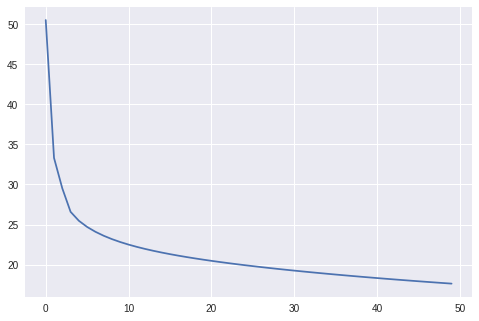

In [0]:
w, losses = batch_gd(X, Y, 50, 0.01, np.array([0, 0, 0]))
pl.figure(figsize = (8,16/3))
pl.plot(losses)

## Online (stochastic) gradient descent

In [0]:
def sgd(X, Y, epochs, eta, w_ini):
    losses = []
    w = w_ini
    n = X.shape[0]
    for i in range(epochs):
        for j in range(n):
            delta = de_dw(w, X[j], Y[j])
            w = w - eta * delta
        losses.append(batch_loss(xentropy_loss,w, X, Y))
    return w, losses

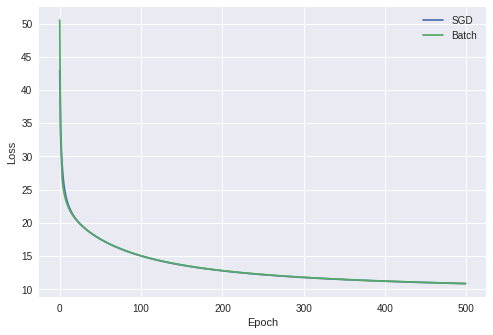

In [0]:
lr = 0.01
epochs = 500
w1, losses_bt = batch_gd(X, Y, epochs, lr, np.array([0, 0, 0]))
w2, losses_ol = sgd(X, Y, epochs, lr, np.array([0, 0, 0]))
pl.figure(figsize = (8,16/3))
pl.plot(np.arange(epochs), losses_ol, label="SGD")
pl.plot(np.arange(epochs), losses_bt, label="Batch")
pl.xlabel("Epoch")
pl.ylabel("Loss")
pl.legend()